Total Points = 20

10 code  blocks to be completed

Each code block is of 2 points

#Support Vector Regression using synthetic data

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Create a nonlinear function

In [2]:
# function to convert linear array to non linear
def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

Generate features and target data for regression

In [3]:
n_samples = 1000
n_features = 6

In [4]:
# generating random features with given dimension
x = 6*np.random.rand(n_samples,n_features)
x

array([[0.58662428, 4.30658256, 3.3690397 , 1.56255784, 4.60982615,
        1.99673221],
       [4.21635677, 4.32497167, 0.14056621, 3.5585775 , 2.94679064,
        2.24634576],
       [0.25118344, 1.01193807, 3.78564045, 2.17079585, 3.15278575,
        2.50746596],
       ...,
       [2.58944805, 2.26520342, 0.42051132, 2.60040498, 4.96164254,
        3.9093717 ],
       [5.43302755, 2.60489064, 2.88699417, 4.04452614, 3.11273989,
        1.7687143 ],
       [1.5483382 , 2.83087395, 3.9222108 , 5.27778199, 0.31669478,
        4.2070823 ]])

In [5]:
# generating target
y = nonlinear(x)+np.random.randn(n_samples)
y

array([ 8.41312721e-01,  1.61999853e+00,  5.11255315e-02, -1.03889731e+00,
        4.34059792e+00,  3.53046017e+00,  2.38031051e+00,  3.89515947e-01,
        4.12811028e-02, -6.15153808e-01, -1.94293080e-01,  9.04426926e-01,
        8.24163012e-01, -5.15205971e-01, -2.87605220e-01,  1.08898160e+00,
        2.94337901e+00,  5.92713937e+00,  9.36335339e-01,  4.24166006e+00,
        6.48919107e+00, -1.06036325e-01,  6.18875209e+00, -6.56259596e-01,
        7.67539838e-01,  3.97520547e+00, -2.50775071e+00,  5.68267877e-01,
        3.49039648e+00, -2.48979026e+00,  1.51241439e+00,  2.50075162e+00,
       -9.27759568e-01, -6.52935939e-01, -1.59809140e+00, -1.97183548e+00,
        1.04180550e+00, -1.35917521e-01,  3.81809848e-01, -6.27491141e-01,
        1.07196195e+00,  1.74240692e+00,  2.03847295e+00,  3.56272984e+00,
        4.62535725e+00,  7.27749314e-01,  5.19521334e-03,  8.47587945e-01,
        2.14338293e+00, -8.32032944e-01,  8.93028506e-01,  3.67677332e+00,
        6.07054244e-01,  

In [6]:
# reshaping target to n*1
y = y.reshape(n_samples,1)
y

array([[ 8.41312721e-01],
       [ 1.61999853e+00],
       [ 5.11255315e-02],
       [-1.03889731e+00],
       [ 4.34059792e+00],
       [ 3.53046017e+00],
       [ 2.38031051e+00],
       [ 3.89515947e-01],
       [ 4.12811028e-02],
       [-6.15153808e-01],
       [-1.94293080e-01],
       [ 9.04426926e-01],
       [ 8.24163012e-01],
       [-5.15205971e-01],
       [-2.87605220e-01],
       [ 1.08898160e+00],
       [ 2.94337901e+00],
       [ 5.92713937e+00],
       [ 9.36335339e-01],
       [ 4.24166006e+00],
       [ 6.48919107e+00],
       [-1.06036325e-01],
       [ 6.18875209e+00],
       [-6.56259596e-01],
       [ 7.67539838e-01],
       [ 3.97520547e+00],
       [-2.50775071e+00],
       [ 5.68267877e-01],
       [ 3.49039648e+00],
       [-2.48979026e+00],
       [ 1.51241439e+00],
       [ 2.50075162e+00],
       [-9.27759568e-01],
       [-6.52935939e-01],
       [-1.59809140e+00],
       [-1.97183548e+00],
       [ 1.04180550e+00],
       [-1.35917521e-01],
       [ 3.8

In [7]:
# Add code below
# read x and y arrays into a dataframe 'df_synthetic' , label the target as 'y' in the dataframe

# converting x & y to a dataframe and concatinating them
df_synthetic = pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis = 1)

# renaming target to 'y'
df_synthetic.columns = [*df_synthetic.columns[:-1], 'y']

# shape of dataframe
print(df_synthetic.shape)

# first 5 rows of df_synthetic
df_synthetic.head()

(1000, 7)


,0,1,2,3,4,5,y
0,0.586624,4.306583,3.369040,1.562558,4.609826,1.996732,0.841313
1,4.216357,4.324972,0.140566,3.558577,2.946791,2.246346,1.619999
2,0.251183,1.011938,3.785640,2.170796,3.152786,2.507466,0.051126
3,0.917481,2.269179,3.771105,4.719503,3.341222,4.328043,-1.038897
4,3.328823,2.781754,1.282882,0.861381,4.100718,4.684917,4.340598


Plot the data - Uncomment the following cell

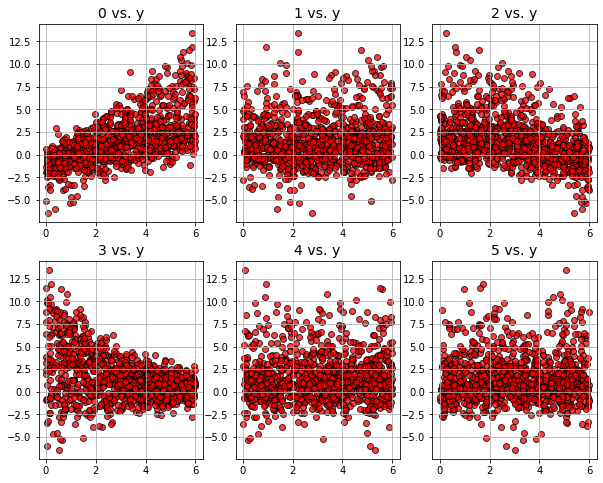

In [8]:
fig,ax = plt.subplots(2,3,figsize=(10,8))
ax = ax.ravel()
for i in range(6):
    ax[i].scatter(df_synthetic[df_synthetic.columns[i]],df_synthetic['y'],edgecolor='k',color='red',alpha=0.75)
    ax[i].set_title(f"{df_synthetic.columns[i]} vs. y",fontsize=14)
    ax[i].grid(True)
plt.show()

In [9]:
# Add code below
# Perform test train split of the dataframe 'df_synthetic'

X = df_synthetic.iloc[:,0:6] # features
y = df_synthetic.iloc[:,-1] # target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

Support vector regressor with linear kernel

In [10]:
# Add code below
# Create linear support vector regressor model and fit it on the dataset
from sklearn.svm import SVR

svr_model = SVR(kernel = 'linear')
svr_model.fit(X_train, y_train) # fitting train valus to datset

SVR(kernel='linear')

In [11]:
# Add code below
# Display the R2 score
from sklearn.metrics import r2_score

# predict xtest
y_pred_linear_svr = svr_model.predict(X_test) # predicting for test set
print("R2 score of linear support vector regressor model: " , round(r2_score(y_test, y_pred_linear_svr),2))

R2 score of linear support vector regressor model:  0.6


In [12]:
# Add code below
# Build a linear regressor on the above dataset and report its R2 score
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)
linear_model.fit(X_train, y_train) # fitting the model
y_pred_linear_reg = linear_model.predict(X_test) # predicting test set
print("R2 score of linear regressor model: ", round(r2_score(y_test, y_pred_linear_reg),2))

R2 score of linear regressor model:  0.6


Support vector regressor with RBF kernel

In [13]:
# Add code below
# Use RBF kernel with default values and perform support vector regression

svr_rbf_model = SVR(kernel = 'rbf')
svr_rbf_model.fit(X_train, y_train) # fitting train valus to dataset

SVR()

In [14]:
# Add code below
# Report R2 score of the above model

y_pred_rbf_svr = svr_rbf_model.predict(X_test) # predicting values for test set
print("R2 score of rbf support vector regressor model: ", round(r2_score(y_test, y_pred_rbf_svr),2))

R2 score of rbf support vector regressor model:  0.81


In [15]:
# Add code below
# Perform grid search of hyperparameters - cost C and epsilon, keep gamma at 'scale' (with cross-validation) to see if the test/validation score be improved

from sklearn.model_selection import GridSearchCV

c_vals = [0.5,1.5,10,20,70] # set of possible C values for hyperparameter tuning
        
ep_vals = [0.01,0.2,0.5,5] # set of possible epsilon values for hyperparameter tuning

param_grid = {'C' : c_vals, 'epsilon' : ep_vals, 'kernel' : ['linear', 'rbf']}

clf = GridSearchCV(SVR(gamma = 'scale'),param_grid,cv = 5) # having 5 fold cross validation to avoid overfitting

clf.fit(X_train,y_train)

clf_df = pd.DataFrame(clf.cv_results_) # converting results of GridSearchCV to a dataframe
clf_df[['param_C','param_epsilon','param_kernel','mean_test_score']] # displaying imp columns


,param_C,param_epsilon,param_kernel,mean_test_score
0,0.5,0.01,linear,0.635512
1,0.5,0.01,rbf,0.771690
2,0.5,0.2,linear,0.634568
3,0.5,0.2,rbf,0.773160
4,0.5,0.5,linear,0.637863
5,0.5,0.5,rbf,0.772980
6,0.5,5,linear,0.511883
7,0.5,5,rbf,0.075510
8,1.5,0.01,linear,0.635897
9,1.5,0.01,rbf,0.819871


In [16]:
# Add code below
# Check best model by the grid search and display it

print(clf.best_score_) # best scores wrt train set
print(clf.best_params_) # best hyperparameter values wrt train set

0.8297706198055487
{'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}


In [18]:
# Add code below
# Fit that model to the data and check the R2 score

model = SVR(kernel = 'rbf',C = 10, epsilon = 0.5)
model.fit(X_train, y_train) # fitting train value to dataset

y_pred = model.predict(X_test) # predicting test values
print("R2 score of support vector regressor model with best hyperparameter values obtained from GridSearchCV: ",
      round(r2_score(y_test, y_pred),2))

R2 score of support vector regressor model with best hyperparameter values obtained from GridSearchCV:  0.81
